## MNIST

In [1]:
# pip install numpy scikit-learn matplotlib

### Randon Forest

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset (MNIST)
digits = datasets.load_digits()

# Display the first 4 images and labels
_, axes = plt.subplots(1, 4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# Data preparation
# Flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, stratify=digits.target, random_state=123)

# Create and train the Random Forest classifier
# The number of trees in the forest is set to 100, and `n_jobs=-1` uses all processors for parallelism
random_forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=42)
random_forest.fit(X_train, y_train)

# Predictions
y_pred = random_forest.predict(X_test)

# Evaluation
print("Classification report for classifier %s:\n%s\n"
      % (random_forest, classification_report(y_test, y_pred)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Display some predictions
_, axes = plt.subplots(1, 4, figsize=(10, 3))
for ax, image, prediction, true_label in zip(axes, X_test.reshape(-1, 8, 8), y_pred, y_test):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Predicted: {prediction}\nTrue: {true_label}')

plt.show()

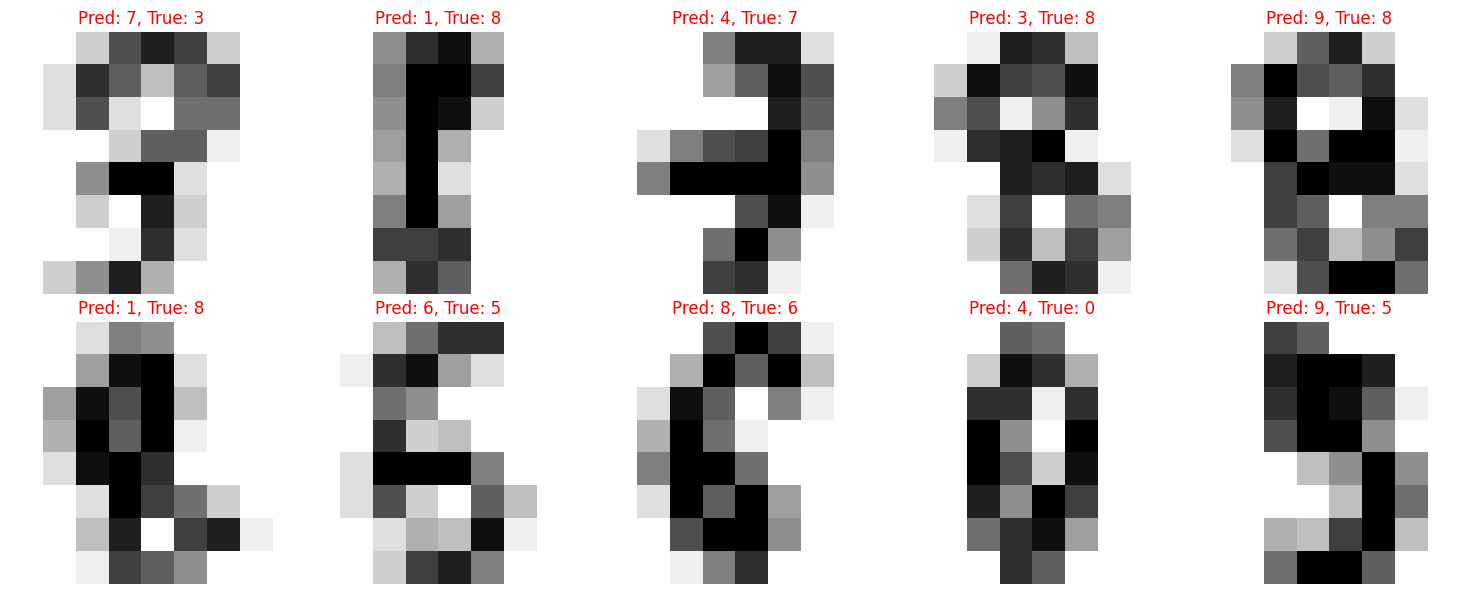

In [3]:
# Filtering out incorrect predictions
incorrect_predictions = [(image, prediction, true_label) for image, prediction, true_label in zip(X_test.reshape(-1, 8, 8), y_pred, y_test) if prediction != true_label]

# Display incorrect predictions - adjusting to display the first 10 examples
_, axes = plt.subplots(2, 5, figsize=(15, 6)) # Adjusted for a 2x5 grid to fit 10 examples
for ax, (image, prediction, true_label) in zip(axes.flat, incorrect_predictions[:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}, True: {true_label}', color='red')

plt.tight_layout()
plt.show()

### SVM

Classification report for classifier SVC(random_state=42):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        89
           1       0.94      1.00      0.97        91
           2       1.00      1.00      1.00        88
           3       1.00      0.99      0.99        92
           4       0.99      1.00      0.99        91
           5       1.00      0.97      0.98        91
           6       0.99      0.99      0.99        91
           7       0.99      0.99      0.99        89
           8       0.99      0.94      0.96        87
           9       0.97      0.99      0.98        90

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899


Confusion Matrix:
 [[88  0  0  0  1  0  0  0  0  0]
 [ 0 91  0  0  0  0  0  0  0  0]
 [ 0  0 88  0  0  0  0  0  0  0]
 [ 0  0  0 91  0  0  0  1  0  0]
 [ 0  0  0  0 91  0  0  0  0  

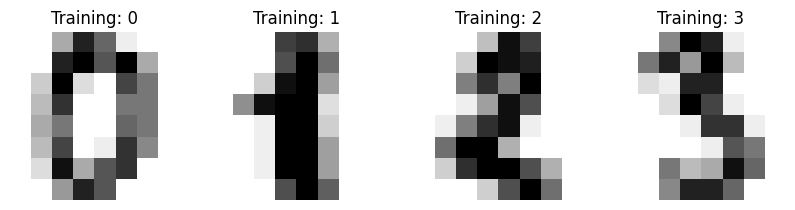

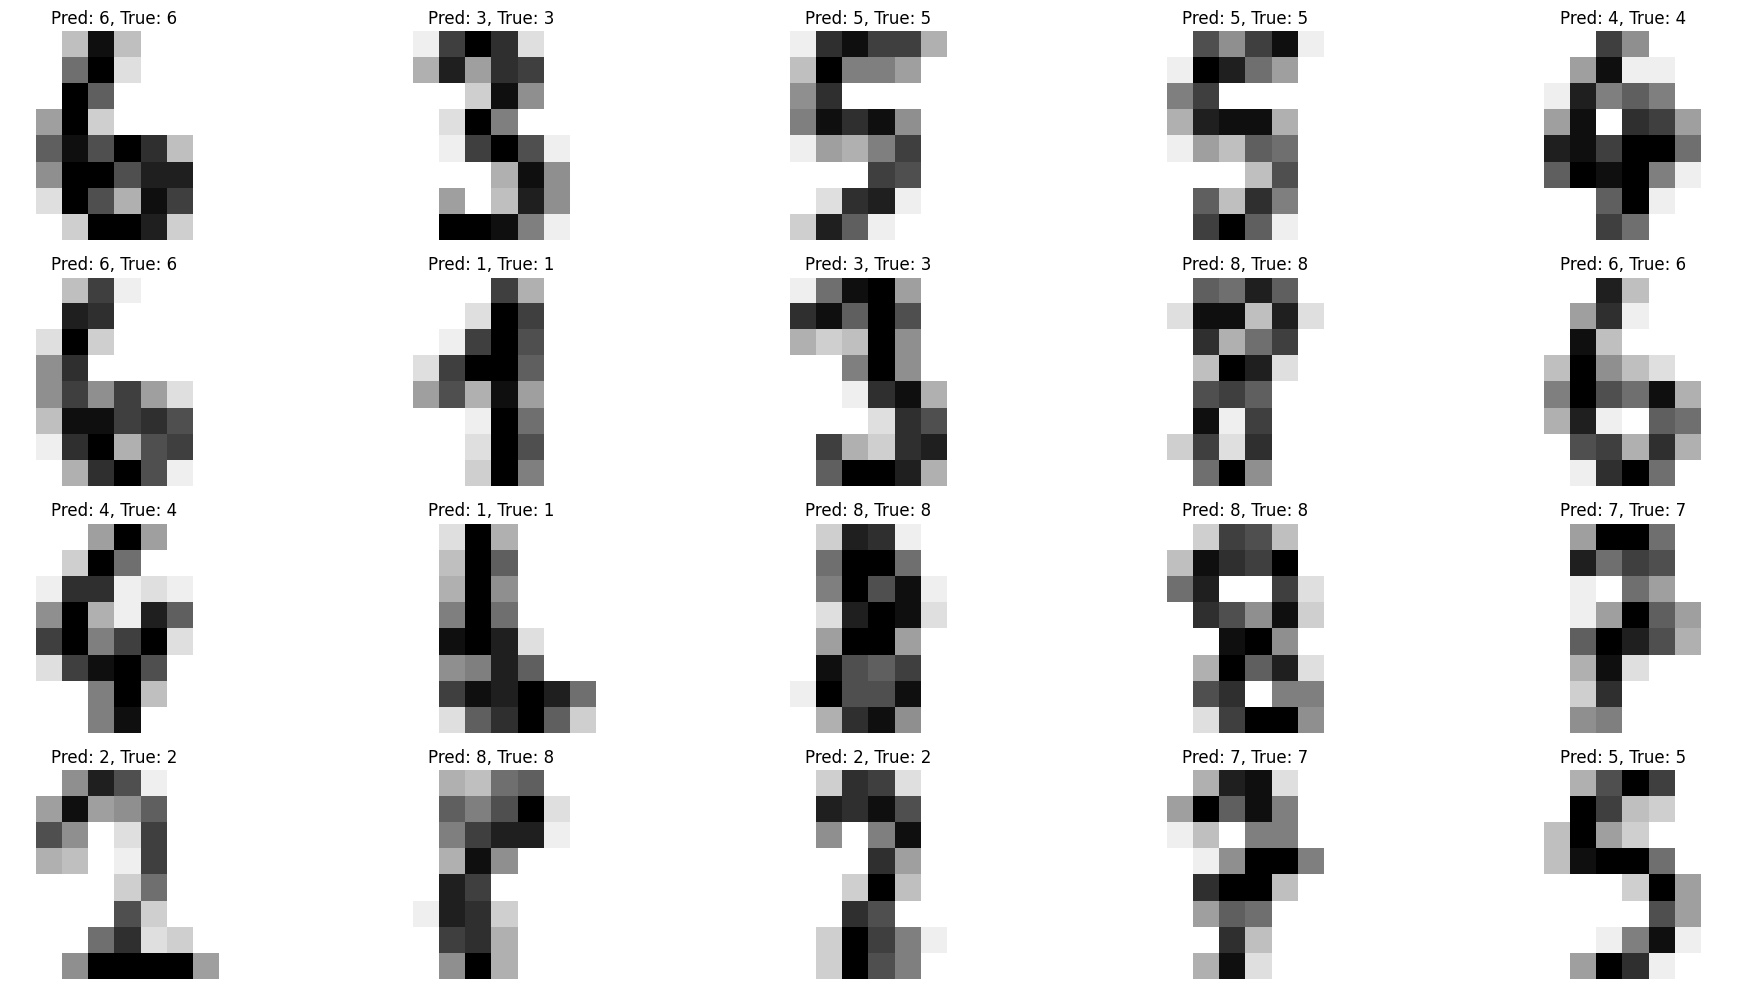

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset (MNIST)
digits = datasets.load_digits()

# Display the first 4 images and labels
_, axes = plt.subplots(1, 4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

# Data preparation
# Flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, stratify=digits.target, random_state=123)

# Create and train the SVM classifier
# The 'gamma' parameter is set to 'scale' as it can automatically adjust to the data range
svm_classifier = SVC(gamma='scale', random_state=42)
svm_classifier.fit(X_train, y_train)

# Predictions
y_pred = svm_classifier.predict(X_test)

# Evaluation
print("Classification report for classifier %s:\n%s\n"
      % (svm_classifier, classification_report(y_test, y_pred)))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Display some predictions - adjusting to display 20 examples
_, axes = plt.subplots(4, 5, figsize=(20, 10)) # Adjusted for a 4x5 grid
images_and_predictions = list(zip(X_test.reshape(-1, 8, 8), y_pred, y_test))
for ax, (image, prediction, true_label) in zip(axes.flat, images_and_predictions[:20]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}, True: {true_label}')

plt.tight_layout()
plt.show()

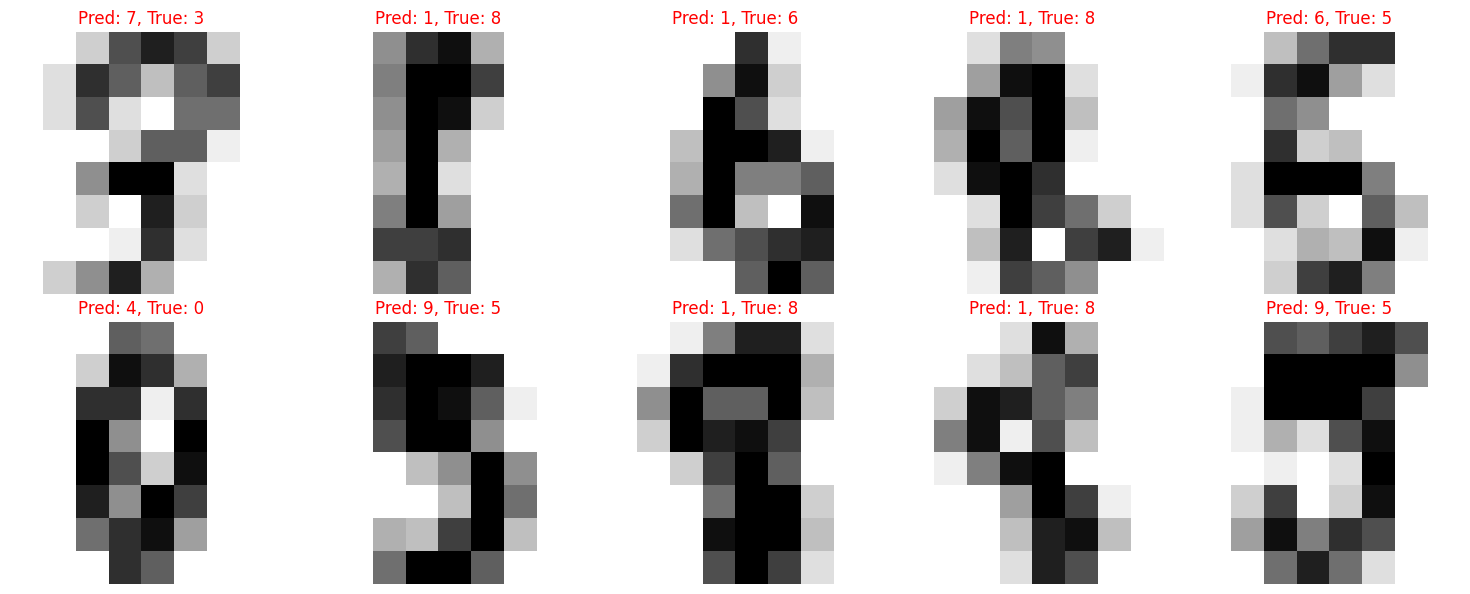

In [5]:
# Filtering out incorrect predictions
incorrect_predictions = [(image, prediction, true_label) for image, prediction, true_label in zip(X_test.reshape(-1, 8, 8), y_pred, y_test) if prediction != true_label]

# Display incorrect predictions - adjusting to display the first 10 examples
_, axes = plt.subplots(2, 5, figsize=(15, 6)) # Adjusted for a 2x5 grid to fit 10 examples
for ax, (image, prediction, true_label) in zip(axes.flat, incorrect_predictions[:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {prediction}, True: {true_label}', color='red')

plt.tight_layout()
plt.show()

### CNN

In [6]:
# pip install tensorflow

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Preprocess the data by reshaping and normalizing
train_images = train_images.reshape((60000, 28, 28, 1)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28, 1)).astype('float32') / 255

# Convert labels to one-hot encoding
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Define the neural network architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

# Predictions for the first 10 images in the test set
predictions = model.predict(test_images[:10])
predicted_labels = np.argmax(predictions, axis=1)

# Display the first 10 test images and their predicted labels
_, axes = plt.subplots(1, 10, figsize=(20, 2))
for ax, image, prediction in zip(axes, test_images[:10], predicted_labels):
    ax.set_axis_off()
    ax.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Predicted: {prediction}')

plt.show()


ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Actual labels for the first 10 images in the test set
actual_labels = np.argmax(test_labels[:10], axis=1)

# Find incorrect predictions
incorrect_indices = [i for i, (pred, actual) in enumerate(zip(predicted_labels, actual_labels)) if pred != actual]

# Display incorrect predictions
if incorrect_indices:
    _, axes = plt.subplots(1, len(incorrect_indices), figsize=(2 * len(incorrect_indices), 4))
    if len(incorrect_indices) == 1: # If there's only one incorrect prediction, we need to treat the axes array differently
        axes = [axes]
    for ax, idx in zip(axes, incorrect_indices):
        ax.imshow(test_images[idx].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
        ax.set_title(f'Pred: {predicted_labels[idx]}\nTrue: {actual_labels[idx]}')
        ax.set_axis_off()
else:
    print("No incorrect predictions in the first 10 test images.")

plt.show()

# For a more comprehensive analysis, let's find and display the first 10 incorrect predictions in the entire test set
predictions_full = model.predict(test_images)
predicted_labels_full = np.argmax(predictions_full, axis=1)
actual_labels_full = np.argmax(test_labels, axis=1)

incorrect_indices_full = [i for i, (pred, actual) in enumerate(zip(predicted_labels_full, actual_labels_full)) if pred != actual]

# Display the first 10 incorrect predictions from the entire test set
_, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax, idx in zip(axes.flat, incorrect_indices_full[:10]):
    ax.imshow(test_images[idx].reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Pred: {predicted_labels_full[idx]}\nTrue: {actual_labels_full[idx]}', color='red')
    ax.set_axis_off()

plt.tight_layout()
plt.show()

: 

: 

: 

: 

: 

: 